<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema

Cuando se necesita ingresar una gran cantidad de datos a un árbol para posteriormente realizar busquedas en este se debería considerar, en caso que se pueda, dejar los datos que se utilicen con mayor frecuencia más cerca de la raíz, para realizar la busqueda de estos con mayor rapidez.

Esto busca organizar según su frecuencia de aparicion los datos de manera que se minimice la cantidad de datos visitados a la hora de buscarlos.

Entrada: una secuencia ordenada de n claves.

Salida: un árbol de busqueda que minimice el costo esperado a la hora de realizar busquedas.


#2. Descripción del algoritmo

El algoritmo del $Optimal BST$ recibe claves con las que va a confeccionar un árbol que reduzca el costo de búsqueda de los nodos.

La creación del árbol se hace realizando particiones sobre el arreglo con los datos, de esta forma se va a ir subdividiendo y donde cada pivote va a ser un nodo del árbol, esto se debe realizar hasta que se llegue al caso base que es cuando el subarreglo tenga tamaño $0$, lo que significa que ese pivote es un nodo hoja.

La subestructura óptima de este algoritmo se basa en ir dividiendo en subarreglos e ir calculando el costo mínimo a partir de estos subproblemas que se generen.

Para el caso del algoritmo con $Bottom Up$ el algoritmo 

#2.1 Implementación del codigo recursivo

In [1]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q

In [34]:
llamadasRec = 0
def minCost(frec, i, j, verbose):
  global llamadasRec                                                  #contador para las llamadas recursivas

  if j < i:                                                         #return para los casos base, cuando entran arreglos de tamaño 0 o 1
      return 0
  if j == i:     
    return frec[i]
     
  if verbose:
    print(f"se suman las frecuencias del arreglo {frec}")

  aux = 0                                                           #se suman todas las frecuencias
  for k in range(i, j + 1):
    aux += frec[k]

  if verbose:
    print(f"la suma de las frecuencias es {aux}")
    
  min = float("inf")                                                #se inicia una variable con infinito para luego almacenar el costo minimo
     
  for r in range(i, j + 1):                                         #se calcula el costo minimo de los subproblemas que se generan
    if verbose:
      print(f"se calculan los costos minimos de los arreglos {frec[i:r-1]} y {frec[r+1:j]} ")
    llamadasRec += 2
    costo = (minCost(frec, i, r - 1, verbose) + minCost(frec, r + 1, j, verbose))
    if costo < min:
      if verbose:
        print(f"se busca el valor menor entre {min} y {costo} ")
      min = costo
                                                         #en caso de encontrar un costo menor al ya guardado se cambia
  if verbose:
    print(f"el costo esperado es de {min+aux}")
    print("\n")

  return min + aux

In [8]:
def OBST(claves, frec, n, verbose):                             #el programa asume que se le entregan keys ordenadas
  #dibujar el arbol con visualize
  return minCost(frec, 0, n - 1, verbose)

In [68]:
def optBinaryTree(p, q, n): 
  e = [[1 for x in range(n+1)] for y in range(0,n)],  
  w = [[1 for x in range(n+1)] for y in range(0,n)]
  root = [[1 for x in range(n+1)] for y in range(0,n)]  
  for i in range(n+1):
    aux = q[i]-1
    e[i,i-1] = aux 
    w[i,i-1] = aux  
  for l in range(1,n):
    for i in range(1,n-l+1):
      j = i + l - 1
      e[i,j] = float("inf") 
      w[i, j] = w[i, j - 1] + p[j] + q[j] 
      for r in range(i,j):
         t = e[i, r - 1] + e[r + 1, j] + w[i, j] 
         if t < e[i, j]: 
            e[i, j] = t 
            root[i, j] = r 

  return e and root 

In [4]:
import random
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
nullnodes=0
def generate_binary_tree(T,A):
    global nullnodes
    if len(A)==1: 
      T.add_node(A[0])
      return A[0]
    else:
      pivote = random.randint(0,len(A)-1)
      T.add_node(A[pivote])

      if pivote > 0:
        left_node = generate_binary_tree(T,A[0:pivote])
        T.add_edge(A[pivote],left_node)
      elif pivote ==0: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1
      
      if pivote < len(A)-1:
        right_node = generate_binary_tree(T,A[pivote+1:])
        T.add_edge(A[pivote],right_node)
      else: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1

      return A[pivote]

## código recursivo con verbose = true

arreglo con claves : [17, 20, 25]
arreglo con las frecuencias: [50, 12, 24]

se suman las frecuencias del arreglo [50, 12, 24]
la suma de las frecuencias es 86
se calculan los costos minimos de los arreglos [50, 12] y [12] 
se suman las frecuencias del arreglo [50, 12, 24]
la suma de las frecuencias es 36
se calculan los costos minimos de los arreglos [] y [] 
se busca el valor menor entre inf y 24 
se calculan los costos minimos de los arreglos [] y [] 
se busca el valor menor entre 24 y 12 
el costo esperado es de 48


se busca el valor menor entre inf y 48 
se calculan los costos minimos de los arreglos [] y [] 
se calculan los costos minimos de los arreglos [50] y [] 
se suman las frecuencias del arreglo [50, 12, 24]
la suma de las frecuencias es 62
se calculan los costos minimos de los arreglos [50, 12] y [] 
se busca el valor menor entre inf y 12 
se calculan los costos minimos de los arreglos [] y [] 
el costo esperado es de 74


el costo esperado es de 134


El costo esperado e

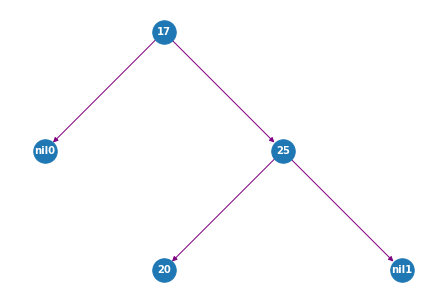

In [35]:
claves = [17, 20,25]
frec= [50,12,24]
#n = len(claves)

#claves,frec,n = optimal_bst_instance_generator(10)
print(f"arreglo con claves : {claves}")
print(f"arreglo con las frecuencias: {frec}\n")
n = len(claves)
verbose = True

print(f"El costo esperado es de {OBST(claves, frec, n, verbose)} con {llamadasRec} llamadas" )
llamadasRec = 0

T = nx.DiGraph()
generate_binary_tree(T,claves)

pos = graphviz_layout(T, prog="dot")

# para mostrar los nodos en sus posiciones y colores, tamaños, etc.
nx.draw(T,pos, with_labels=True, node_size=550, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="purple")
nullnodes = 0

# código recursivo con verbose = false

arreglo con claves : [17, 20, 25]
arreglo con las frecuencias: [50, 12, 24]
El costo esperado es de 134 con 14 llamadas


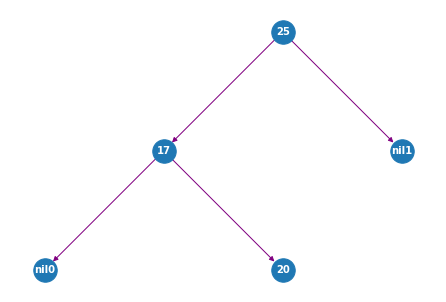

In [71]:
claves = [17, 20,25]
frec= [50,12,24]

print(f"arreglo con claves : {claves}")
print(f"arreglo con las frecuencias: {frec}")
n = len(claves)
verbose = False

print(f"El costo esperado es de {OBST(claves, frec, n, verbose)} con {llamadasRec} llamadas" )
llamadasRec = 0

T = nx.DiGraph()
generate_binary_tree(T,claves)

pos = graphviz_layout(T, prog="dot")

# para mostrar los nodos en sus posiciones y colores, tamaños, etc.
nx.draw(T,pos, with_labels=True, node_size=550, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="purple")
nullnodes = 0

#2.2 Implementación codigo dinámico

In [60]:
contSubproblemas = 0
def BSTDin(claves,frec,n,verbose):
  costo = [[0 for x in range(n)] for y in range(n)]                             #se inicializa una matriz para poder almacenar los costos calculados
  global contSubproblemas

  for i in range(n):                                                            #se guardan las frecuencias del arreglo original y se guardan en la matriz de memoria
    costo[i][i] = frec[i]

  for l in range(2,n+1):
    for i in range(n - l+1):
      j = i + l - 1

      if verbose:
        print(f"se calcula la suma de las frecuencias")
      suma = 0
      for k in range(i, j+1):                                                   #se suman las frecuencias
        suma += frec[k]

      if verbose:
        print(f"la suma de las frecuencias es: {suma}")

      if i >= n or j >=n:                                                       #caso base
        break
      costo[i][j] = float("inf")                                                #se inicializa la posición de costo en donde se va a ir almacenando el costo calculado

      for r in range(i,j+1):                                                    #se comienza a comparar en busca del menor costo
        if verbose:
          print("se comienza a buscar los valores más optimos")
        contSubproblemas += 1
        aux = 0
        if r > i:
          if verbose:
            print(f"comparando si {r} es mayor a {i}")
          aux += costo[i][r-1]
          if verbose:
            print(f"nuevo costo minimo: {aux}")
        if r < j:
          if verbose:
            print(f"comparando si {r+1} es menor a {j}")
          aux += costo[r+1][j]
        aux += suma
        if verbose:
          print(f"nuevo costo minimo: {aux}")
        if aux < costo[i][j]:
          costo[i][j] = aux

        print(f"subproblemas terminados, nuevo costo mínimo: {costo[0][n-1]}\n")

  return costo[0][n-1]      

[2, 18, 36]
[0.05681676509289473, 0.22453045333259217, 0.08816971243587507]
se calcula la suma de las frecuencias
la suma de las frecuencias es: 0.2813472184254869
se comienza a buscar los valores más optimos
comparando si 1 es menor a 1
nuevo costo minimo: 0.5058776717580791
subproblemas terminados, nuevo costo mínimo: 0

se comienza a buscar los valores más optimos
comparando si 1 es mayor a 0
nuevo costo minimo: 0.05681676509289473
nuevo costo minimo: 0.3381639835183816
subproblemas terminados, nuevo costo mínimo: 0

se calcula la suma de las frecuencias
la suma de las frecuencias es: 0.31270016576846726
se comienza a buscar los valores más optimos
comparando si 2 es menor a 2
nuevo costo minimo: 0.40086987820434233
subproblemas terminados, nuevo costo mínimo: 0

se comienza a buscar los valores más optimos
comparando si 2 es mayor a 1
nuevo costo minimo: 0.22453045333259217
nuevo costo minimo: 0.5372306191010594
subproblemas terminados, nuevo costo mínimo: 0

se calcula la suma de 

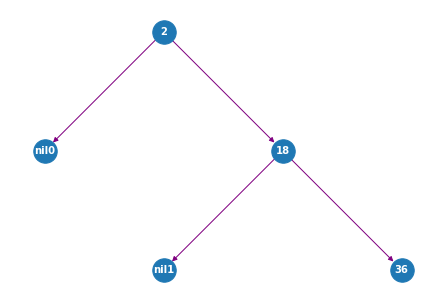

In [61]:
claves,frec,n = optimal_bst_instance_generator(3)
#claves = [10, 12, 20]
#frec= [34, 8, 50]
print(claves)
print(frec)
n = len(claves)
verbose = True

print(f"El costo esperado es de {BSTDin(claves, frec, n, verbose)} con {contSubproblemas} llamadas" )
contSubproblemas = 0

T = nx.DiGraph()
generate_binary_tree(T,claves)

pos = graphviz_layout(T, prog="dot")

# para mostrar los nodos en sus posiciones y colores, tamaños, etc.
nx.draw(T,pos, with_labels=True, node_size=550, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="purple")
nullnodes = 0

#3 correctitud

El algoritmo con programación dinámica trata de resolver los subproblemas que se generan, los cuales su costo se encuentran definidos por:

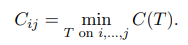

y el costo total del árbol por:

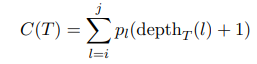


Relación de recurrencia

Si tenemos una raíz T en i hasta j, tenemos:

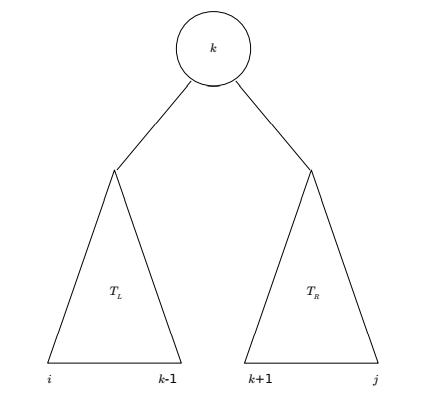

Podemos calcular el costo de T como:

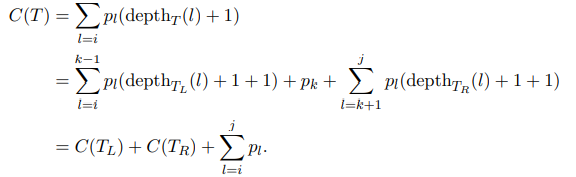

Y definir la función de recurrencia de la siguiente manera:

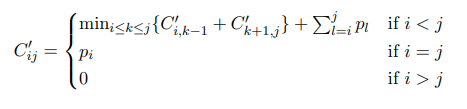

##Teorema

El algoritmo calcula correctamente el costo esperado de una secuencia de claves con la frecuencia de aparación de estas.

###Demostración por inducción

###Caso base

###Caso inductivo

caso 1: 


#4. Tiempo de ejecucción

### Optimal BST recursivo

Al ser una implementación recursiva muy probablemente se resuelvan los mismos subproblemas que se encuentren dentro de los ${2n\choose n}\frac{1}{n+1}$ posibles árboles que pueden resultar. Esto resulta en la complejidad de la versión recursia en $O(e^n)$.

### Optimal BST dinámico

La versión dinámica no sufre de los problemas de su contraparte recursiva, puesto que guarda en la memoria los valores que ya ha calculado, por lo que resuelve los subproblemas una única vez. Debido a que el algoritmo necesita tener tres ciclos anidados $for$ que van hasta $n$, lo que nos da un tiempo de ejecucción de $O(n^3)$. Existe una forma de reducir el tiempo de ejecucción de esta versión a un $O(n^2)$, el cuál requiere de utilizar el "Teorema de Knuth", el cuál restringe valores para que no se tengan que realizar iteraciones innecesarias.